In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
%matplotlib inline

housing = pd.read_csv('~/Classes/Packt_Data_Analysis/data/data/house_train.csv')

numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

housing = housing[numerical_vars + categorical_vars]

housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')

## 2.6 Relationships between numerical variables

The seaborn library excels when we want to investigate relationship variables, with very few lines of code we can get very informative plots and discover patterns and relationships between our variables.

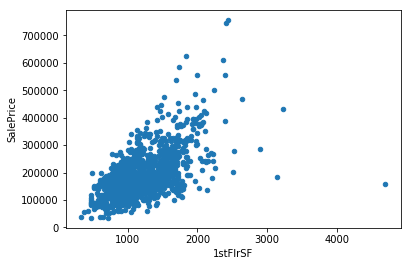

In [2]:
housing.plot.scatter(x = '1stFlrSF', y = 'SalePrice');

/home/digger/anaconda3/envs/Data_Analysis/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


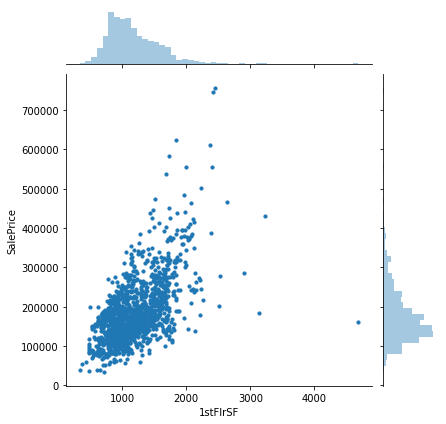

In [3]:
sns.jointplot(x = '1stFlrSF', y = 'SalePrice', data = housing, joint_kws={"s": 10});

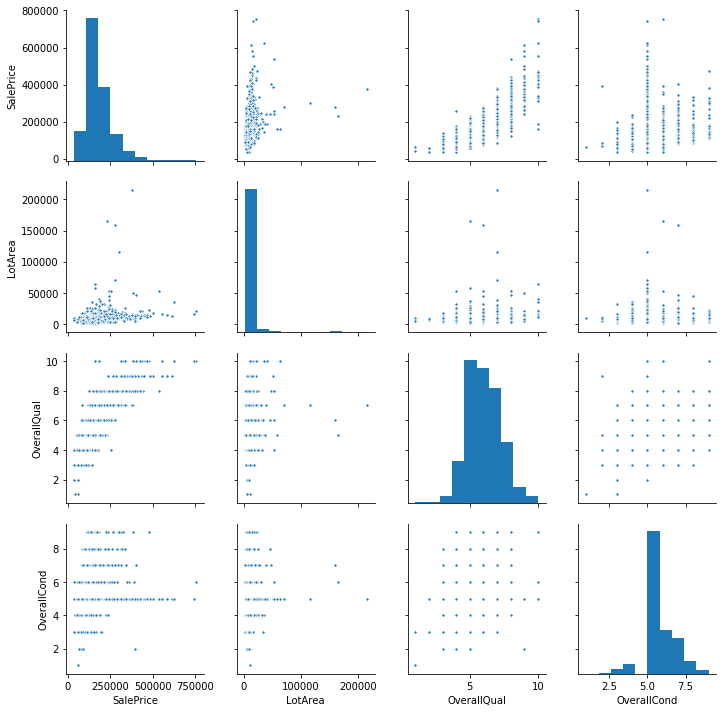

In [4]:
sns.pairplot(housing[numerical_vars[:4]], plot_kws = {"s": 10});

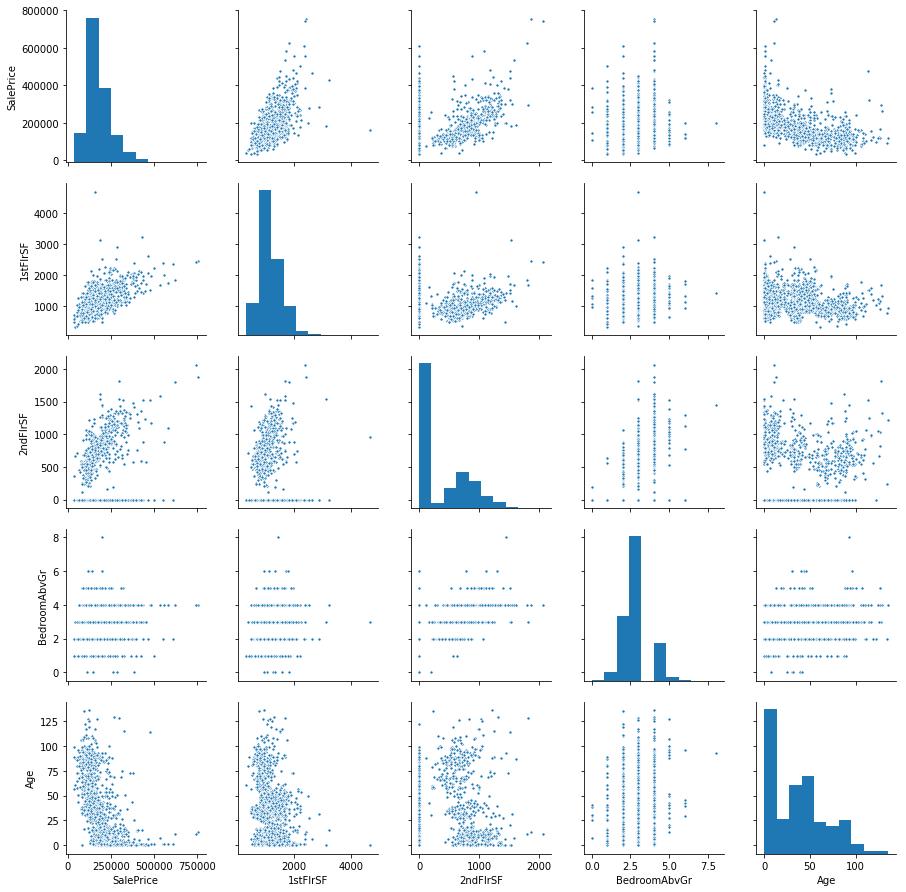

In [5]:
sns.pairplot(housing[['SalePrice'] + numerical_vars[4:]], plot_kws = {"s": 10});

In [6]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.605852,0.319334,0.168213,-0.523350
LotArea,0.263843,1.000000,0.105806,-0.005636,0.299475,0.050986,0.119690,-0.014832
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.476224,0.295493,0.101676,-0.572629
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.144203,0.028942,0.012980,0.377325
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,1.000000,-0.202646,0.127401,-0.282143
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,-0.202646,1.000000,0.502901,-0.011552
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,0.127401,0.502901,1.000000,0.068960
Age,-0.523350,-0.014832,-0.572629,0.377325,-0.282143,-0.011552,0.068960,1.000000


In [7]:
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
1stFlrSF        0.605852
2ndFlrSF        0.319334
LotArea         0.263843
BedroomAbvGr    0.168213
OverallCond    -0.077856
Age            -0.523350
Name: SalePrice, dtype: float64

In [8]:
correlations = housing[numerical_vars].corr()

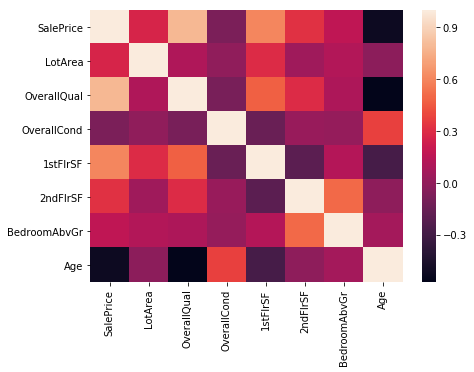

In [9]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.heatmap(correlations, ax = ax);

## 2.7 Relationship of SalePrice with categorical variables

Here we are interested in the relashionship between the categorical variables in our dataset and the SalePrice of the house. The standard plot to examine the relashionship between a numerical and a categorical variable is the boxplot. A boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. 

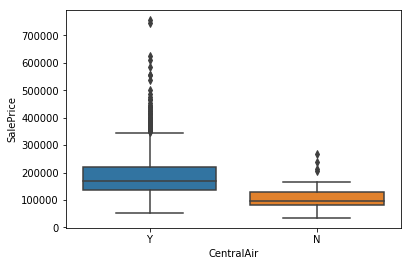

In [10]:
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing);

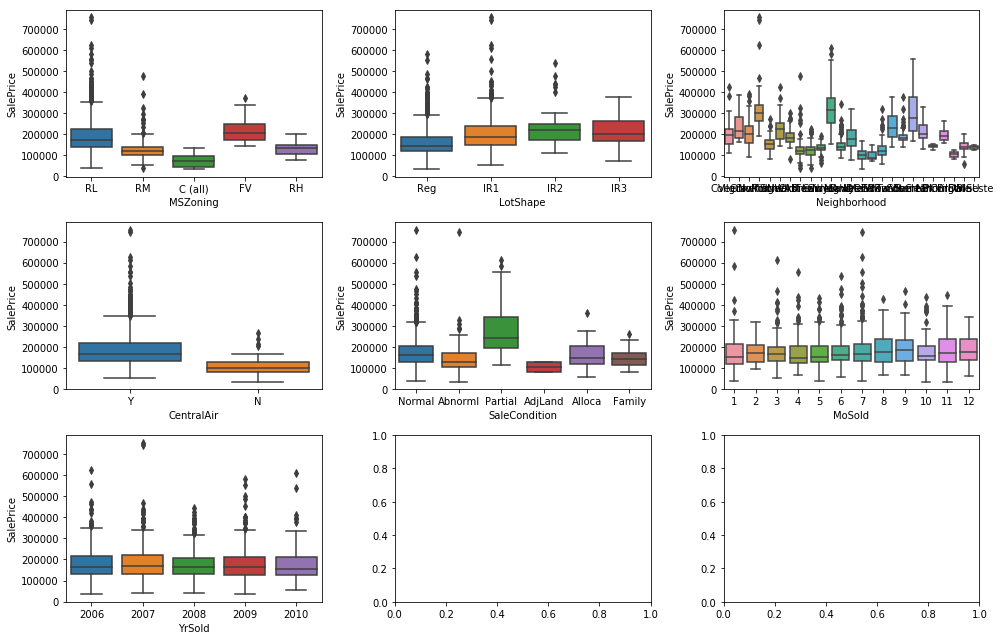

In [11]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

fig.tight_layout()

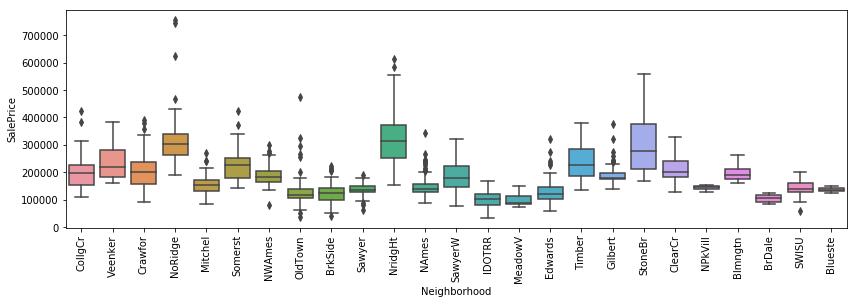

In [12]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing, ax = ax)
plt.xticks(rotation = 'vertical');

In [13]:
sorted_nb = housing.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values

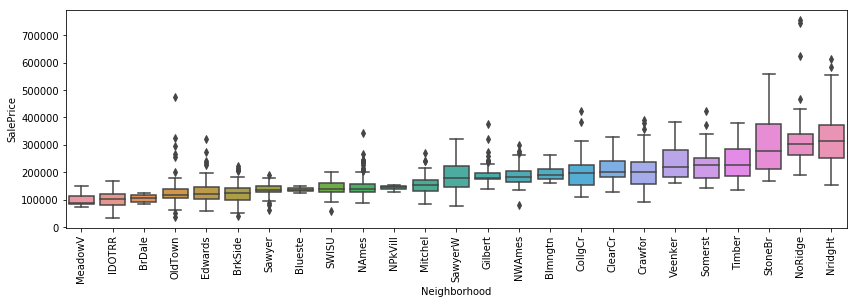

In [14]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing, order = sorted_nb, ax = ax)
plt.xticks(rotation = 'vertical');

Small boxes means that the prices is very close to each other. Large boxes, larger dispersions.

## 2.8 More complex plots

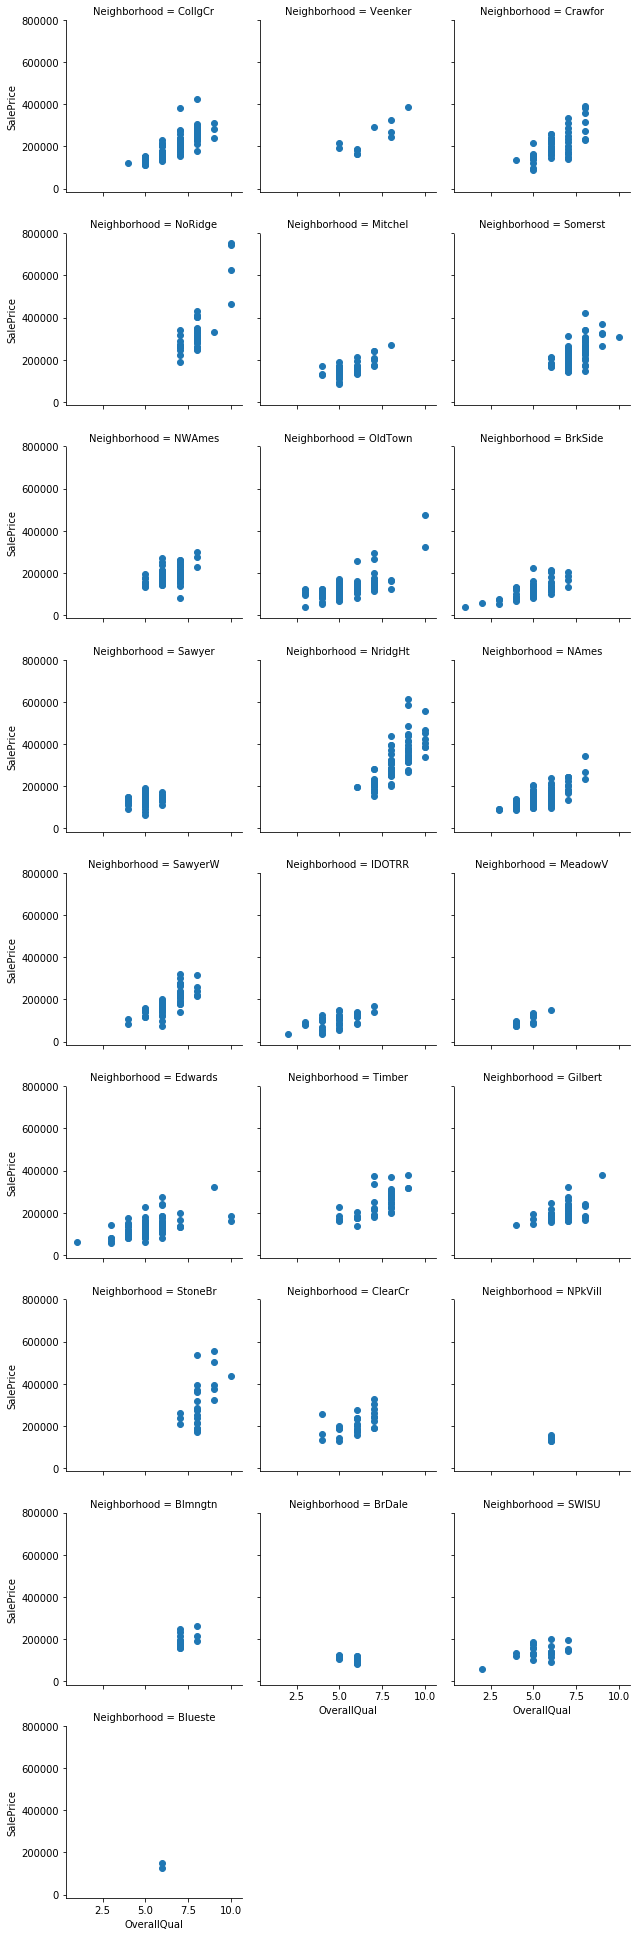

In [15]:
conditional_plot = sns.FacetGrid(housing, col = "Neighborhood", col_wrap = 3)
conditional_plot.map(plt.scatter, "OverallQual", "SalePrice");

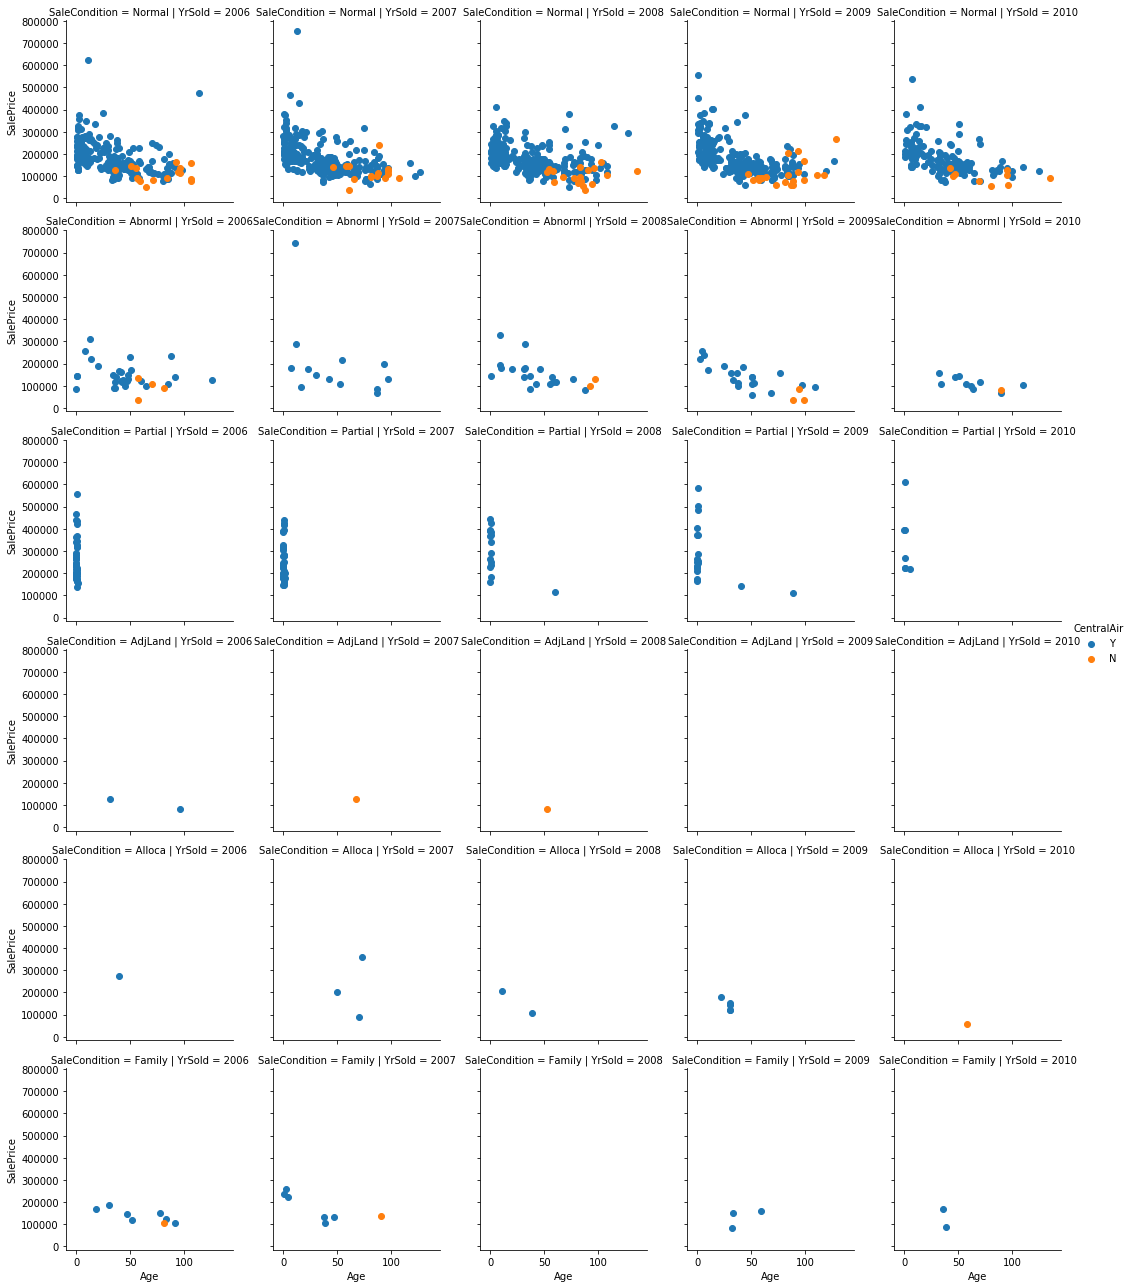

In [16]:
conditional_plot = sns.FacetGrid(housing, col= "YrSold", row = "SaleCondition", hue = 'CentralAir')
conditional_plot.map(plt.scatter, "Age", "SalePrice").add_legend();